
# Step 1 Data Acquisition and Visualization: In this step, you need to:
(a) Download the “MNIST” dataset and extract the files. You will get four files with
extension .gz (e.g., train-images-idx3-ubyte.gz). You can use the provided function read_idx
below to read in the dataset. As its official description, the dataset is split into 60000 training
images and 10000 images. The four file corresponds to the training images, training labels,
testing images and testing labels. You need to print out their shape to finish this step. (5 pts)

In [1]:
import gzip
import numpy as np
import requests
import struct

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for _ in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

url = 'http://yann.lecun.com/exdb/mnist/'
file_names = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 
              't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

for file_name in file_names:
    r = requests.get(url + file_name)
    with open(file_name, 'wb') as f:
        f.write(r.content)
        
train_images = read_idx(file_names[0])
train_labels = read_idx(file_names[1])
test_images = read_idx(file_names[2])
test_labels = read_idx(file_names[3])

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape) 
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


(b) To further understand what the dataset is, you need to use the ‘matplotlib’ library to
print out a random data with code plt.imshow together with its label.(5 pts)

Label:  7


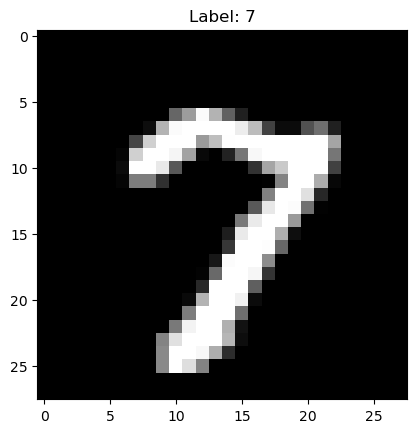

In [2]:
import matplotlib.pyplot as plt

# Select a random index
idx = np.random.randint(0, len(train_images))

# Print out the label
print("Label: ", train_labels[idx]) 

# Reshape the 784 pixel vector to a 28x28 image
img = train_images[idx].reshape(28,28)

# Plot the image
plt.imshow(img, cmap='gray')
plt.title("Label: {}".format(train_labels[idx]))
plt.show()

# Step 2 Data Preprocessing: In this step, you need to:
(a) Normalize the pixel values of images to be between 0 and 1. (5 pts)
(b) Convert the labels from categorical data into numerical values using one-hot encoding.
(5 pts) hint: you can explore the eye function in Numpy.

In [3]:
import numpy as np

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
num_classes = 10
train_labels_one_hot = np.eye(num_classes)[train_labels] 
test_labels_one_hot = np.eye(num_classes)[test_labels]

print("Normalized train images shape:", train_images.shape)
print("One-hot encoded train labels shape:", train_labels_one_hot.shape)

print("Normalized test images shape:", test_images.shape)  
print("One-hot encoded test labels shape:", test_labels_one_hot.shape)

Normalized train images shape: (60000, 28, 28)
One-hot encoded train labels shape: (60000, 10)
Normalized test images shape: (10000, 28, 28)
One-hot encoded test labels shape: (10000, 10)


# Step 3 Network Initialization: We will work with a neuron network with two hidden layers, using Sigmoid function as the activation functions for hidden layers and softmax activation function for the output layer. To finish this, you need to:
(a) Identify the auxiliary input including the Sigmoid function and its derivative and
Softmax function (5 pts)
(b) Initialize all the parameters in neural network uniformly. In this network, the input size
is 784 dimensions (each input is a 28x28 image, so you have to flatten the data from 2D to 1D). For the two linear hidden layers, we have 128 and 64 neurons respectively. For
the output layer, its size will be 10 since there are 10 classes (0-9) in MNIST. To finish
this step, you need to initialize the weights and bias in random with a pre-set random
seed using Numpy. Please set the seed value = 695. 

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

In [5]:
import numpy as np

np.random.seed(695) 

input_size = 784 # 28x28 images
hidden_layer1_size = 128
hidden_layer2_size = 64
num_classes = 10

# Initialize weights
w1 = np.random.uniform(size=(input_size, hidden_layer1_size)) 
w2 = np.random.uniform(size=(hidden_layer1_size, hidden_layer2_size))
w3 = np.random.uniform(size=(hidden_layer2_size, num_classes))

# Initialize biases 
b1 = np.zeros(hidden_layer1_size)
b2 = np.zeros(hidden_layer2_size)
b3 = np.zeros(num_classes)


# Step 4 Feed Forward: In this step, you need to:
(a) define a function named feed_forward. Given an input x, it should output the sigmoid of
wx+b where w and b indicates the weights and bias defined in step 2.

In [6]:
import numpy as np

def feed_forward(x, w1, b1, w2, b2, w3, b3):

    # Hidden layer 1
    z1 = x.dot(w1) + b1 
    a1 = sigmoid(z1)
    
    # Hidden layer 2
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    
    # Output layer
    z3 = a2.dot(w3) + b3
    y = softmax(z3)
    
    return y

# Step 5 Back Propagation: In this step, you need to implement the back
propagation:
(a) You need to compute the loss for the output layer first. Here, we use categorical cross
entropy loss function given below for multi-class classification problem. (5 pts) Note, to
achieve this, you need to first encode the categorical labels as numerical values using
one-hot encoding finished in step 2. (b) Calculate the gradients for the weights and bias for each layer. Use the chain rule to
compute gradients for previous layers. (10 pts)

In [12]:
import numpy as np

def compute_loss(y_true, y_pred):

    # One-hot encode y_true
    y_true = np.eye(num_classes)[y_true]
    
    # Compute cross-entropy loss 
    loss = -np.sum(y_true * np.log(y_pred))
    
    return loss

In [13]:
# (a) Categorical cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
  loss = -np.sum(y_true * np.log(y_pred))
  return loss

# (b) Compute gradients
def backprop(x, y_true, W1, b1, W2, b2, W3, b3):

  # feedforward
  y_pred = feed_forward(x, W1, b1, W2, b2, W3, b3)
  
  # gradients
  dL_dy = y_pred - y_true # for output layer
  
  dL_dW3 = a2.T.dot(dL_dy) 
  dL_db3 = np.sum(dL_dy, axis=0)
  
  dL_da2 = dL_dy.dot(W3.T)
  dL_dz2 = dL_da2 * sigmoid_deriv(z2)
  
  dL_dW2 = a1.T.dot(dL_dz2)
  dL_db2 = np.sum(dL_dz2, axis=0)

  dL_da1 = dL_dz2.dot(W2.T) 
  dL_dz1 = dL_da1 * sigmoid_deriv(z1)

  dL_dW1 = x.T.dot(dL_dz1)
  dL_db1 = np.sum(dL_dz1, axis=0)

  return dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3

# Step 6 Model Training: In this step, you need to:
(a) Use mini-batch gradient descent to update the parameters including weights and bias.
Notice that a complete training round consists of a feed forward process, back
propagation and parameter update. Define the batch size = 128 and epoch = 100.

In [9]:
# Train for 100 epochs with batch size 128
for epoch in range(100):
  X_train = []
  for i in range(0, len(X_train), 128):
    batch_X = X_train[i:i+128]
    batch_y = y_train[i:i+128]

    # Feedforward
    y_pred = feed_forward(batch_X, W1, b1, W2, b2, W3, b3)
    
    # Backprop
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backprop(batch_X, batch_y, W1, b1, W2, b2, W3, b3)
    
    # Update weights & biases
    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2 
    b2 -= learning_rate * dL_db2
    W3 -= learning_rate * dL_dW3
    b3 -= learning_rate * dL_db3

# Step 7 Model Evaluation: In this step, you need to:
(a) Use your trained neural network to predict the labels of the test dataset and compute
the accuracy on the test dataset. (5 pts)
Remark: if you correctly execute every step above, you will probably get a result around
90%.
(b) Plot some of the misclassified images with their predicted and true labels. (5 pts) This
probably can give you some insights into why these images are misclassified.

In [20]:
input_dim = 784
hidden_dim1 = 128
hidden_dim2 = 64
output_dim = 695

# Step 3 - Initialize network parameters

W1 = np.random.randn(input_dim, hidden_dim1)
b1 = np.random.randn(hidden_dim1) 

W2 = np.random.randn(hidden_dim1, hidden_dim2)
b2 = np.random.randn(hidden_dim2)

W3 = np.random.randn(hidden_dim2, output_dim) 
b3 = np.random.randn(output_dim)

y_pred = feed_forward(X_test, W1, b1, W2, b2, W3, b3)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_labels == y_true_labels)
print('Test accuracy:', accuracy)

# (b) Plot misclassified examples
misclassified_idx = np.where(y_pred_labels != y_true_labels)[0]
num_plots = 25 
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i, idx in enumerate(misclassified_idx[:num_plots]):
    img = X_test[idx].reshape(28,28)
    ax = axs[i//5, i%5] 
    ax.imshow(img, cmap='gray')
    ax.set_title(f"True: {y_true_labels[idx]}\nPred: {y_pred_labels[idx]}")
    ax.axis('off') 
plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'dot'